#  Data cleaning - D1


In [1]:
import pandas as pd
from matplotlib import *

In [2]:
# import dataset D1
d1 = pd.read_csv('./_datasets/ISTAT_Immigrants_residence_type_nationality.csv')

In [3]:
for columns in d1:
    print(columns)

TIPO_DATO15
Data type
SEXISTAT1
Gender
ISO
Most relevant Country of citizenship
DURATA
Type of residence permit
TIME
Select time
Value
Flag Codes
Flags


In [4]:
d1.head()

,TIPO_DATO15,Data type,SEXISTAT1,Gender,ISO,Most relevant Country of citizenship,DURATA,Type of residence permit,TIME,Select time,Value,Flag Codes,Flags
0,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2012,2012,195310,NaN,NaN
1,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2013,2013,184513,NaN,NaN
2,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2014,2014,181956,NaN,NaN
3,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2015,2015,176292,NaN,NaN
4,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2016,2016,162406,NaN,NaN


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   TIPO_DATO15                           4216 non-null   object 
 1   Data type                             4216 non-null   object 
 2   SEXISTAT1                             4216 non-null   int64  
 3   Gender                                4216 non-null   object 
 4   ISO                                   4216 non-null   object 
 5   Most relevant Country of citizenship  4216 non-null   object 
 6   DURATA                                4216 non-null   object 
 7   Type of residence permit              4216 non-null   object 
 8   TIME                                  4216 non-null   int64  
 9   Select time                           4216 non-null   int64  
 10  Value                                 4216 non-null   int64  
 11  Flag Codes       

In [6]:
# converting year datatype from 'integer' to 'datatime'
d1['TIME'] = pd.to_datetime(d1['TIME'], format='%Y')


In [7]:
d1.head()

,TIPO_DATO15,Data type,SEXISTAT1,Gender,ISO,Most relevant Country of citizenship,DURATA,Type of residence permit,TIME,Select time,Value,Flag Codes,Flags
0,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2012-01-01,2012,195310,NaN,NaN
1,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2013-01-01,2013,184513,NaN,NaN
2,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2014-01-01,2014,181956,NaN,NaN
3,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2015-01-01,2015,176292,NaN,NaN
4,RESPER,residence permits on 1st January,9,total,MA,Morocco,NLONGT,non long-term,2016-01-01,2016,162406,NaN,NaN


In [8]:
# dropping unuseful columns
d1 = d1.drop(['TIPO_DATO15', 'Data type','SEXISTAT1','Select time', 'Flag Codes', 'Flags'], axis=1)

d1.rename(columns={'Gender':'gender', 'Most relevant Country of citizenship':'country_of_citizenship', 'DURATA':'pemit_duration', 'Type of residence permit':'permit_type', 'TIME':'date'}, inplace = True)

d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  4216 non-null   object        
 1   ISO                     4216 non-null   object        
 2   country_of_citizenship  4216 non-null   object        
 3   pemit_duration          4216 non-null   object        
 4   permit_type             4216 non-null   object        
 5   date                    4216 non-null   datetime64[ns]
 6   Value                   4216 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 230.7+ KB


In [9]:
# drop rows related to Continents, with ISO longer than two characters
d1 = d1.loc[d1["ISO"].str.len() == 2]
d1


,gender,ISO,country_of_citizenship,pemit_duration,permit_type,date,Value
0,total,MA,Morocco,NLONGT,non long-term,2012-01-01,195310
1,total,MA,Morocco,NLONGT,non long-term,2013-01-01,184513
2,total,MA,Morocco,NLONGT,non long-term,2014-01-01,181956
3,total,MA,Morocco,NLONGT,non long-term,2015-01-01,176292
4,total,MA,Morocco,NLONGT,non long-term,2016-01-01,162406
...,...,...,...,...,...,...,...
4153,total,CI,Côte d'Ivoire,LONGT,long-term,2018-01-01,14279
4154,total,CI,Côte d'Ivoire,LONGT,long-term,2019-01-01,14294
4155,total,CI,Côte d'Ivoire,LONGT,long-term,2020-01-01,13356
4156,total,CI,Côte d'Ivoire,LONGT,long-term,2021-01-01,12288


In [10]:
country_totals = d1.groupby('country_of_citizenship')['Value'].sum().reset_index()

country_totals_sorted = country_totals.sort_values('Value', ascending=False)

highest_immigrant_country = country_totals_sorted.iloc[0]['country_of_citizenship']

print(f"The country with the highest number of immigrants is: {highest_immigrant_country}")

The country with the highest number of immigrants is: Morocco


In [13]:
top_n_countries = country_totals_sorted.head(10)
top_n_countries = top_n_countries.set_index('country_of_citizenship')
top_n_countries

,Value
country_of_citizenship,
Morocco,10280732
Albania,9936862
China,6774762
Ukraine,5093578
Philippines,3526670
India,3503298
Egypt,3026296
Bangladesh,2969372
Moldova,2930800


<Axes: ylabel='country_of_citizenship'>

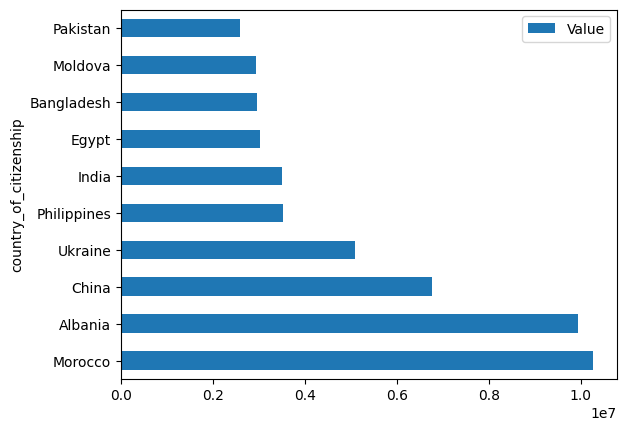

In [14]:
top_n_countries.plot(kind="barh")